# Import Library

In [1]:
!pip install pandasql

In [2]:
import warnings
warnings.filterwarnings('ignore')

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
# import pandasql as ps
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

numpy version :  2.0.2
pandas version :  2.2.2
seaborn version :  0.13.2


# Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dibimbing/Assignment/ADay38_Create Unsupervised Machine Learning/flight.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Understanding

In [4]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


About datasetet <br>

| Code             | Description                                    |
|------------------|------------------------------------------------|
| MEMBER_NO-b      | ID Member                                      |
| FFP_DATE         | Frequent Flyer Program Join Date               |
| FIRST_FLIGHT_DATE| Tanggal Penerbangan pertama                    |
| GENDER           | Jenis Kelamin                                  |
| FFP_TIER         | Tier dari Frequent Flyer Program               |
| WORK_CITY        | Kota Asal                                      |
| WORK_CITY        | Kota Asal                                      |
| WORK_PROVINCE    | Provinsi Asal                                  |
| WORK_COUNTRY     | Negara Asal                                    |
| AGE              | Umur Customer                                  |
| LOAD_TIME        | Tanggal data diambil                           |
| FLIGHT_COUNT     | Jumlah penerbangan Customer                    |
| BP_SUM           | Rencana Perjalanan                             |
| SUM_YR_1         | Total credit/point di tahun pertama            |
| SUM_YR_2         | Total credit/point di tahun kedua              |
| SEG_KM_SUM       | Total jarak(km) penerbangan yang sudah dilakukan |
| LAST_FLIGHT_DATE | Tanggal penerbangan terakhir                   |
| LAST_TO_END      | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir |
| AVG_INTERVAL     | Rata-rata jarak waktu                          |
| MAX_INTERVAL     | Maksimal jarak waktu                           |
| EXCHANGE_COUNT   | Jumlah penukaran                                |
| avg_discount     | Rata rata discount yang didapat customer       |
| Points_Sum       | Jumlah poin yang didapat customer              |
| Points_NotFlight | Poin yang tidak digunakan oleh members         |

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

* This dataset has 62988 rows dan 23 columns.
* There are several columns that have missing values.
* We probably don't need `MEMBER_NO` since it contains unique values
* Based on the values, the data type of `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, and `LAST_FLIGHT_DATE` should be `datetime`

## Statistic Descriptive

In [6]:
numeric = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns
categorical = df.select_dtypes(exclude=[np.number]).columns

In [7]:
df[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


The dataset contains 62,988 entries with an average age of 42 years. There is a wide variation in FLIGHT\_COUNT, SEG\_KM\_SUM, and Points\_Sum, indicating significant differences in customer activity. The average discount is stable at around 0.72, and the travel interval shows a broad range.


In [8]:
df[categorical].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


The data shows considerable variation in FFP\_DATE and FIRST\_FLIGHT\_DATE, with the most frequent dates being 1/13/2011 and 2/16/2013, respectively. The majority of customers are male. The most common WORK\_CITY and WORK\_PROVINCE are Guangzhou and Guangdong, while most customers come from the WORK\_COUNTRY China (CN).


## Univariate

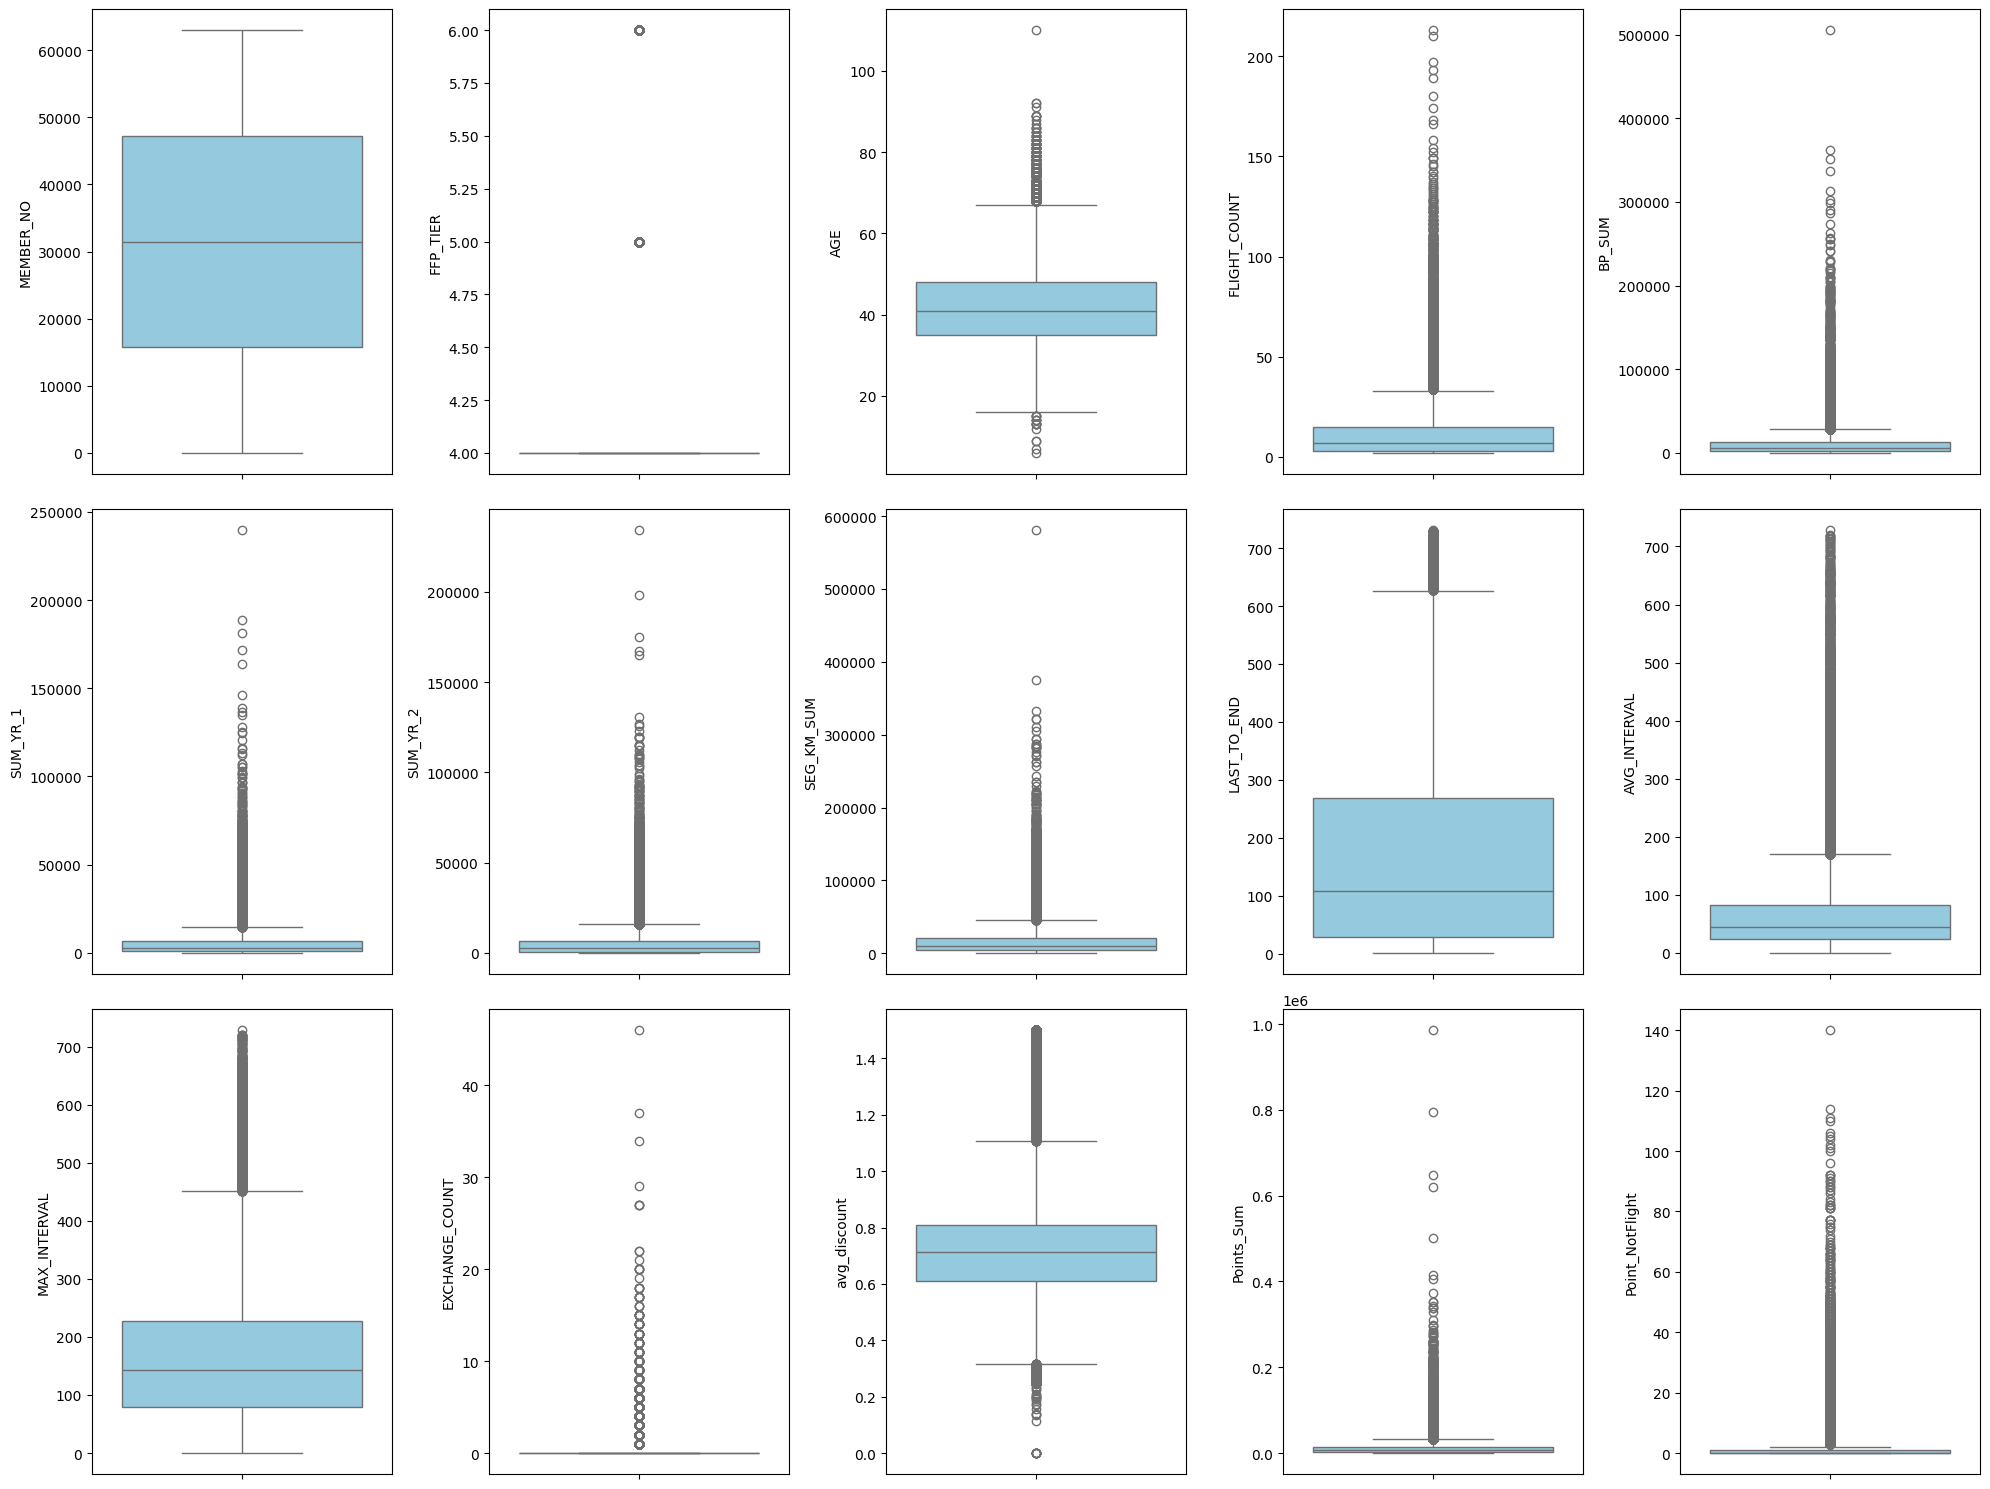

In [9]:
plt.figure(figsize=(20,15))
features = numeric
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

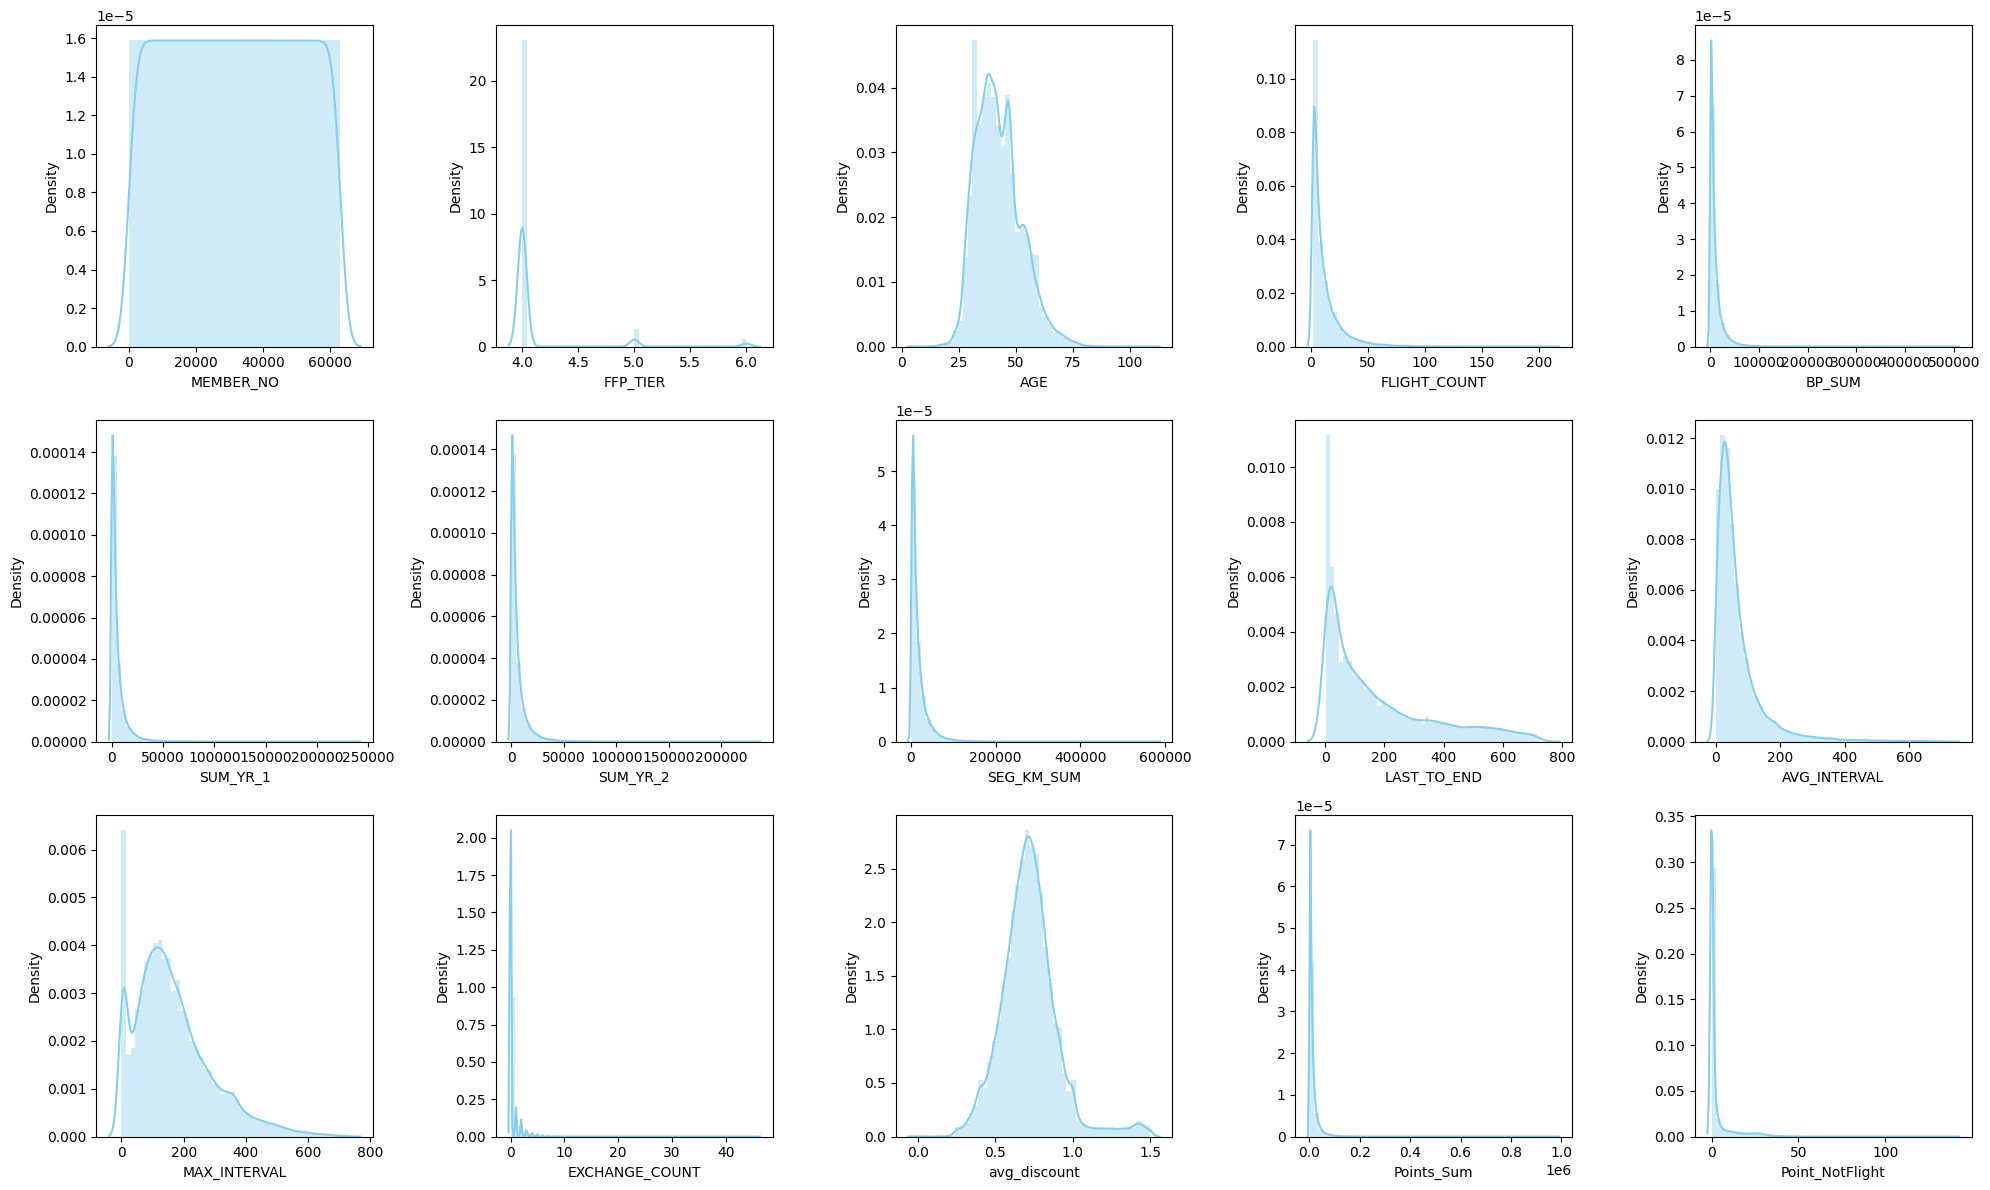

In [10]:
plt.figure(figsize=(20,12))

for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Dari boxplot dan plot KDE di atas, dapat disimpulkan bahwa:
* `FFP_TIER` is actually categorical value, because it has discrete values (4, 5 or 6)
* `EXCHANGE_COUNT`, `Points_Sum` and `Point_NotFlight` has many unique values, there is no need to handle the outliers later
* `MEMBER_NO` has unique values so no need to check its symmetricity
* Most of the features are positively skewed and have some extreme features

## Multivariate

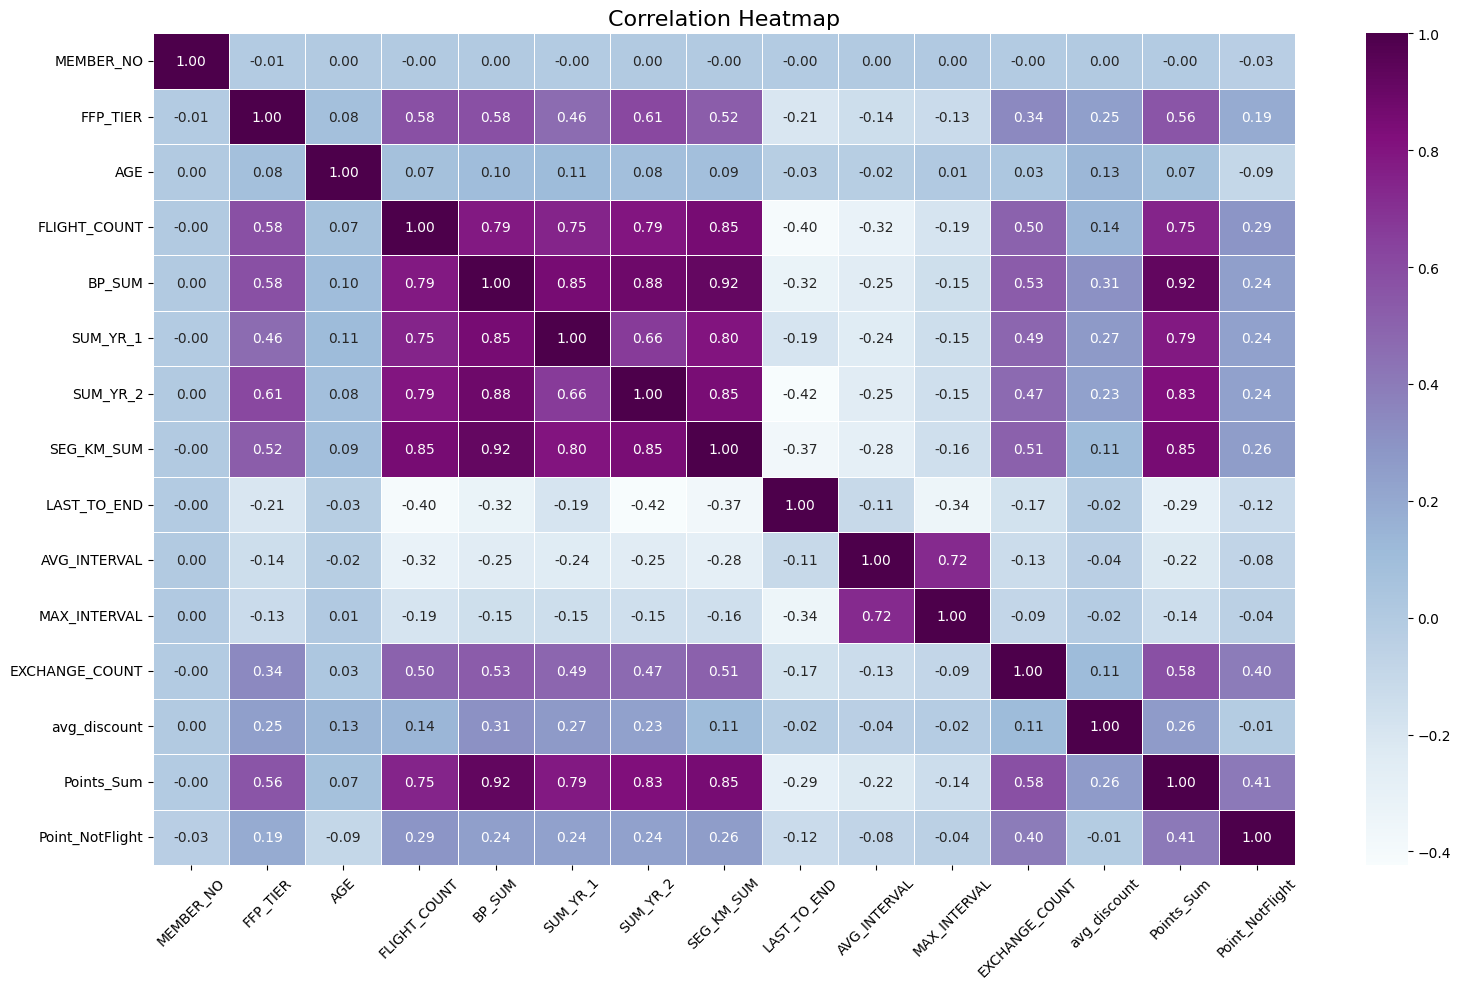

In [11]:
# Ambil hanya kolom numerik
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi antar variabel numerik
corr_ = df_numeric.corr()

# Visualisasikan dengan heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_, annot=True, fmt=".2f", cmap="BuPu", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

* Strong positive correlations are observed among the features FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, and Points_Sum, with correlation values ranging from 0.75 to 0.92. This indicates that the more frequently customers fly, the larger their travel plans, points earned, and total distance traveled.

* FFP_TIER also shows moderate to strong positive correlations (around 0.46 to 0.61) with key features such as FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, and Points_Sum, suggesting that members with higher tiers generally have higher frequency and points.

* A weak negative correlation is seen between LAST_TO_END and most features, meaning that the longer the time gap between the last flight and the latest booking, the lower the frequency or points tend to be.

* Features like AGE and avg_discount have low correlations with other features, indicating that age and average discount have little impact on flight patterns or points.

# Preprocessing

## Fix type data

In [12]:
df['FFP_DATE']= pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE']= pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LOAD_TIME']= pd.to_datetime(df['LOAD_TIME'])

However when we try to change `LAST_FLIGHT_DATE` into datetime, an error occured. The error is because on a date there is a '2014/2/29' value. As we know that 2014 is not a leap year, so I will change it to '2014/2/28'

In [13]:
# Replace '2014/2/29' with '3/1/2014' after ensuring no time portion exists
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].astype(str).replace('2014/2/29  0:00:00', '3/1/2014', regex=False)

# Replace obj to datetime
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], format="%m/%d/%Y", errors='coerce')

## Check duplicate

In [14]:
#cek duplicate data
len(df.drop_duplicates()) / len(df)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

No duplicate

## Handling missing value

In [15]:
row_n,col_n=df.shape
row_n,col_n=df.shape
df_desc=df.isna().sum(axis=0).reset_index()
df_desc.columns=['Variable','Missing_values']
df_desc['Filling_Values (%)']=(row_n-df_desc['Missing_values'])*100/row_n
df_desc['Filling_Values (%)'] = df_desc['Filling_Values (%)'].round(2)
df_desc

,Variable,Missing_values,Filling_Values (%)
0,MEMBER_NO,0,100.00
1,FFP_DATE,0,100.00
2,FIRST_FLIGHT_DATE,0,100.00
3,GENDER,3,100.00
4,FFP_TIER,0,100.00
5,WORK_CITY,2269,96.40
6,WORK_PROVINCE,3248,94.84
7,WORK_COUNTRY,26,99.96
8,AGE,420,99.33
9,LOAD_TIME,0,100.00


In [16]:
# Fill missing categorical with the mode (most frequent value)
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0], inplace=True)

# Fill missing numeric with the median value
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].median(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].median(), inplace=True)

# Check if there are any missing values left
df.isna().sum()

,0
MEMBER_NO,0
FFP_DATE,0
FIRST_FLIGHT_DATE,0
GENDER,0
FFP_TIER,0
WORK_CITY,0
WORK_PROVINCE,0
WORK_COUNTRY,0
AGE,0
LOAD_TIME,0


Previous observations identified some flight records with ticket prices and average discounts of zero, despite having a positive total flight distance. This inconsistency is considered an anomaly.

In [17]:
# Check anomaly value
df[(df.SUM_YR_1 == 0) & (df.SUM_YR_2 == 0) & (df.avg_discount == 0) & (df.SEG_KM_SUM > 0)]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
62980,1761,2012-08-07,2012-09-09,Female,4,shenzhen,guangdong,CN,29.0,2014-03-31,2,0,0.0,0.0,6138,2012-09-21,558,12.0,12,0,0.0,0,0
62981,15206,2011-12-02,2011-12-02,Female,4,guangzhou,guangdong,CN,42.0,2014-03-31,2,0,0.0,0.0,2158,2013-10-06,178,3.0,3,0,0.0,0,0
62982,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.0,2014-03-31,2,0,0.0,0.0,3848,2013-01-20,437,0.0,0,0,0.0,0,0
62983,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,2,0,0.0,0.0,1134,2013-06-09,297,4.0,4,1,0.0,12318,22
62984,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.0,2014-03-31,4,0,0.0,0.0,8016,2014-01-03,89,37.0,60,14,0.0,106972,43
62985,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,2,0,0.0,0.0,2594,2014-03-03,29,166.0,166,0,0.0,0,0
62986,61027,2013-02-06,2013-02-14,Female,4,guangzhou,guangdong,CN,36.0,2014-03-31,2,0,0.0,0.0,3934,2013-02-26,400,12.0,12,0,0.0,0,0


In [18]:
# Handling anomaly value
df.drop(df[(df.SUM_YR_1 == 0) & (df.SUM_YR_2 == 0) & (df.avg_discount == 0) & (df.SEG_KM_SUM > 0)].index, inplace = True)

## Feature Selection

Some feature engineerings will be performed with a great focus to the concept of LFRM analysis. <br>

* Length: the length of days between subscriber's first
register day to observation time. A larger number means they have been a member for a longer time (the bigger the better)<br>
* Recency: the length of a passenger's last consumption to observation window. A smaller number means they flew more recently (the smaller the better)<br>
* Frequency the passenger's consumption frequency within a certain period of time. A bigger number means they flew more frequently (the bigger the better) <br>
* Monetary the average amount spent over a certain period of time. A bigger number means they spent more money (the bigger the better) <br>
* Discount Coefficient: the average space discount factor for passengers traveling within a certain period of time A bigger number means they use discounts more (the smaller the better) <br>

Therefore, I will try to select feature that will be used in my analysis. The columns that are related to the parameters are as follow:

* Length: LOAD_TIME - FFP_DATE
* Recency: LAST_TO_END
* Frequency: FLIGHT_COUNT
* Monetary: SEG_KM_FM
* Customer Cost: avg_discount



In [19]:
lrfmc = df[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
lrfmc.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014-03-31,2006-11-02,1,210,580717,0.961639
1,2014-03-31,2007-02-19,7,140,293678,1.252314
2,2014-03-31,2007-02-01,11,135,283712,1.254676
3,2014-03-31,2008-08-22,97,23,281336,1.090870
4,2014-03-31,2009-04-10,5,152,309928,0.970658


In [20]:
lrfmc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62981 entries, 0 to 62987
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   LOAD_TIME     62981 non-null  datetime64[ns]
 1   FFP_DATE      62981 non-null  datetime64[ns]
 2   LAST_TO_END   62981 non-null  int64         
 3   FLIGHT_COUNT  62981 non-null  int64         
 4   SEG_KM_SUM    62981 non-null  int64         
 5   avg_discount  62981 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.4 MB


## Data Transformation

In [21]:
# make new colum for Length
lrfmc['MEMBER_DURATION'] = ((lrfmc['LOAD_TIME'] - lrfmc['FFP_DATE']).dt.days/30).astype(int)
# Calculate the difference in days and divide by 30 to approximate months, then convert to integers.

In [22]:
#change name colum to LRFMC
lrfmc = lrfmc[['MEMBER_DURATION', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
lrfmc.columns = ['L','R','F','M','C']
lrfmc.head()

,L,R,F,M,C
0,90,1,210,580717,0.961639
1,86,7,140,293678,1.252314
2,87,11,135,283712,1.254676
3,68,97,23,281336,1.090870
4,60,5,152,309928,0.970658


## Handling Outlier

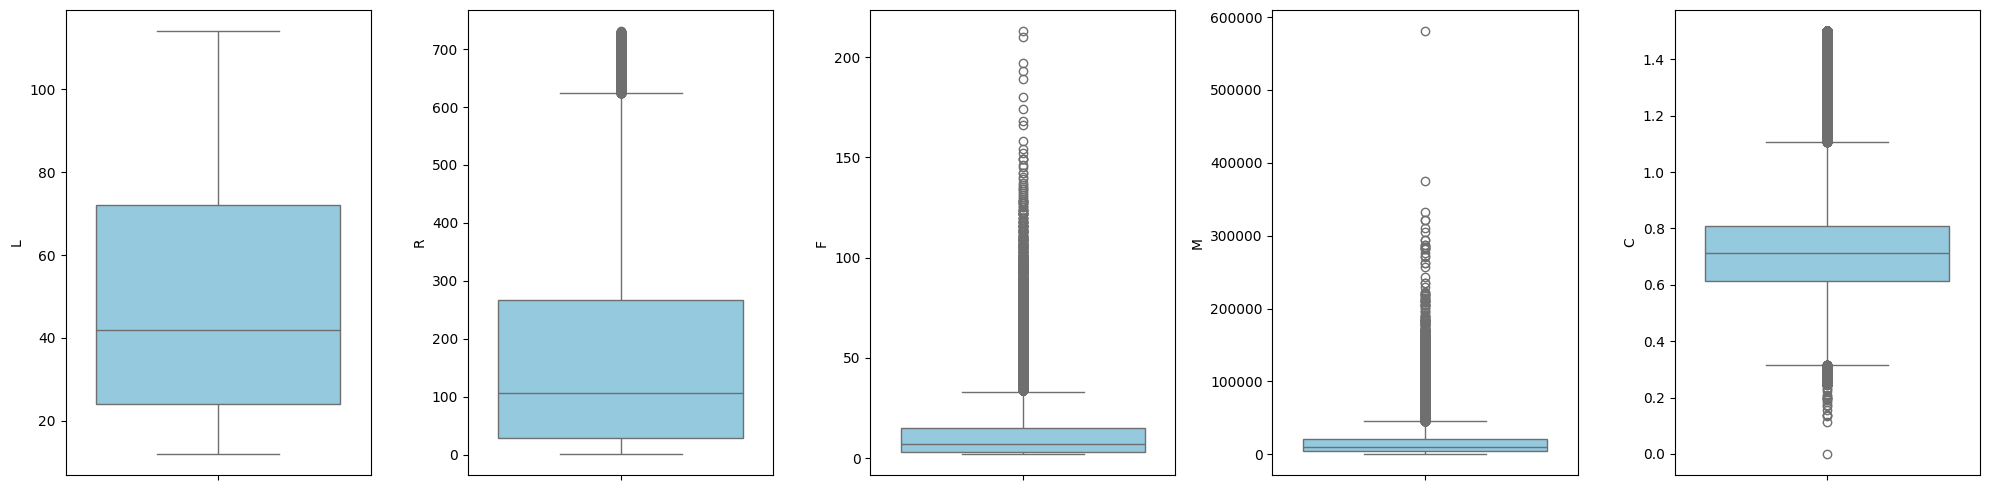

In [23]:
plt.figure(figsize=(20,5))
for i, feature in enumerate(lrfmc.columns):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=lrfmc[feature], color='skyblue')
    plt.tight_layout()

Based on the boxplot, there are significant extreme values or outliers present in the F, M, and C columns. To address this issue without losing substantial data, winsorizing was applied by capping the extreme values at the 1st and 99th percentiles. Winsorizing is a technique that replaces outlier values with these threshold limits, thereby preserving the integrity and completeness of the dataset for further analysis.

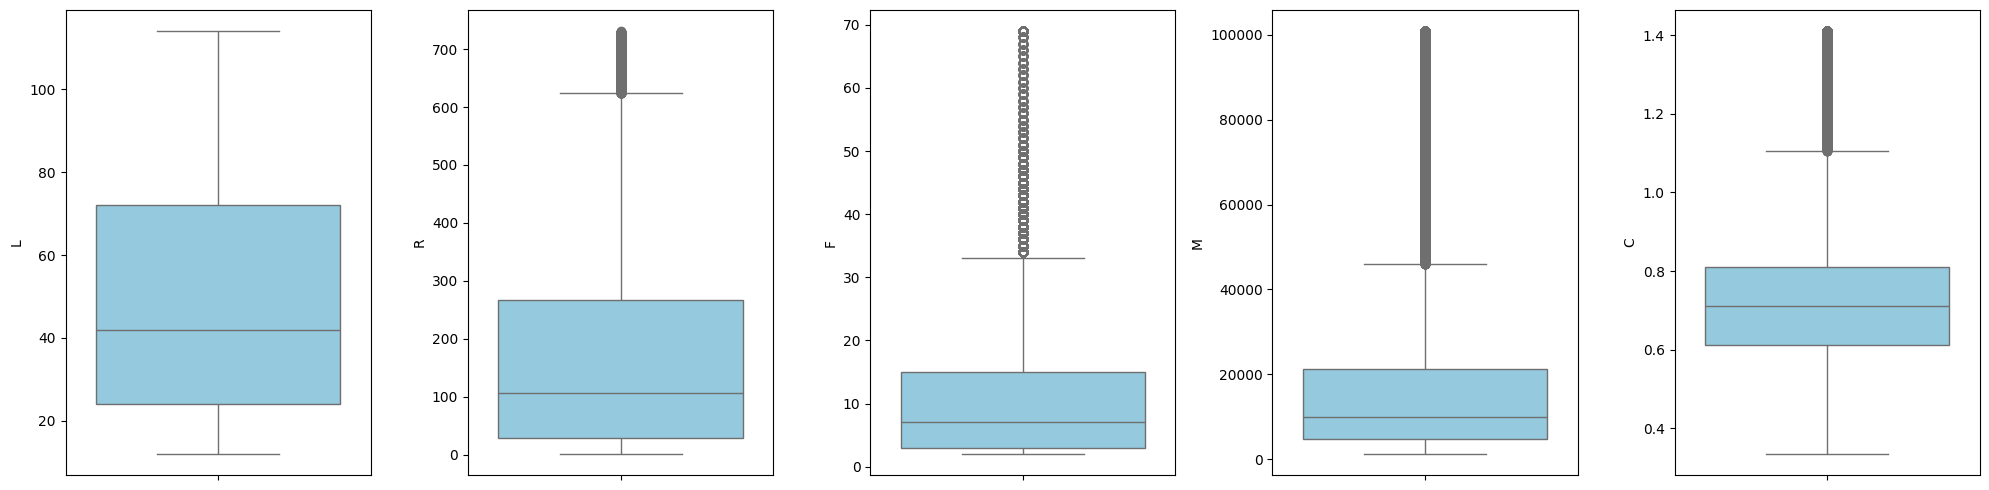

In [24]:
from scipy.stats.mstats import winsorize

lrfmc_winsor = lrfmc.copy()

#List fitur yang ingin di-winsorize
features = ['F', 'M', 'C']

#Terapkan Winsorizing pada setiap kolom
for feature in features:
    # Terapkan Winsorizing, batas bawah dan atas adalah 1% dan 99%
     lrfmc_winsor[feature] = winsorize(lrfmc_winsor[feature], limits=[0.01, 0.01])

# Visualisasikan kembali boxplot setelah Winsorizing
plt.figure(figsize=(20,5))
for i, feature in enumerate(lrfmc_winsor.columns):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=lrfmc_winsor[feature], color='skyblue')
    plt.tight_layout()

In [25]:
lrfmc_winsor.shape

(62981, 5)

## Data Standardization

Because each column has a different range, we have to do standardization.

In [26]:
sc = StandardScaler()
lrfmc_std = sc.fit_transform(lrfmc_winsor.astype(float))

In [27]:
lrfmc_std = pd.DataFrame(data=lrfmc_std, columns=lrfmc_winsor.columns)
lrfmc_std.head()

,L,R,F,M,C
0,1.451116,-0.952618,4.477999,4.530848,1.315351
1,1.309482,-0.919977,4.477999,4.530848,2.908481
2,1.344890,-0.898217,4.477999,4.530848,2.921422
3,0.672131,-0.430362,0.887608,4.530848,2.023636
4,0.388863,-0.930858,4.477999,4.530848,1.364782


# K-Means Clustering

Before we do the modeling, we have to determine the number of clusters. For determining the optimal number of clusters, I check the inertia.

## Best K

In [28]:
#elbow method
from sklearn.cluster import KMeans
list_inertia = []

for jumlah_cluster in range(3, 13):
  kmeans = KMeans(n_clusters=jumlah_cluster, random_state=0)
  kmeans.fit(lrfmc_std)
  nilai_inertia = kmeans.inertia_
  list_inertia.append(nilai_inertia)
  print('jumlah cluster : ',jumlah_cluster, 'nilai inertia : ',nilai_inertia)
list_inertia

jumlah cluster :  3 nilai inertia :  179058.94570972215
jumlah cluster :  4 nilai inertia :  146388.03563659414
jumlah cluster :  5 nilai inertia :  128882.38465080394
jumlah cluster :  6 nilai inertia :  114822.32124666197
jumlah cluster :  7 nilai inertia :  107557.3616858029
jumlah cluster :  8 nilai inertia :  97282.33811163792
jumlah cluster :  9 nilai inertia :  90392.61006855807
jumlah cluster :  10 nilai inertia :  86426.25983995263
jumlah cluster :  11 nilai inertia :  80158.44483152877
jumlah cluster :  12 nilai inertia :  75935.09662950285


[179058.94570972215,
 146388.03563659414,
 128882.38465080394,
 114822.32124666197,
 107557.3616858029,
 97282.33811163792,
 90392.61006855807,
 86426.25983995263,
 80158.44483152877,
 75935.09662950285]

In [29]:
#silhouette score
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(3,13))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(lrfmc_std)
    preds = kmeans.predict(lrfmc_std)

    score_euclidean = silhouette_score(lrfmc_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

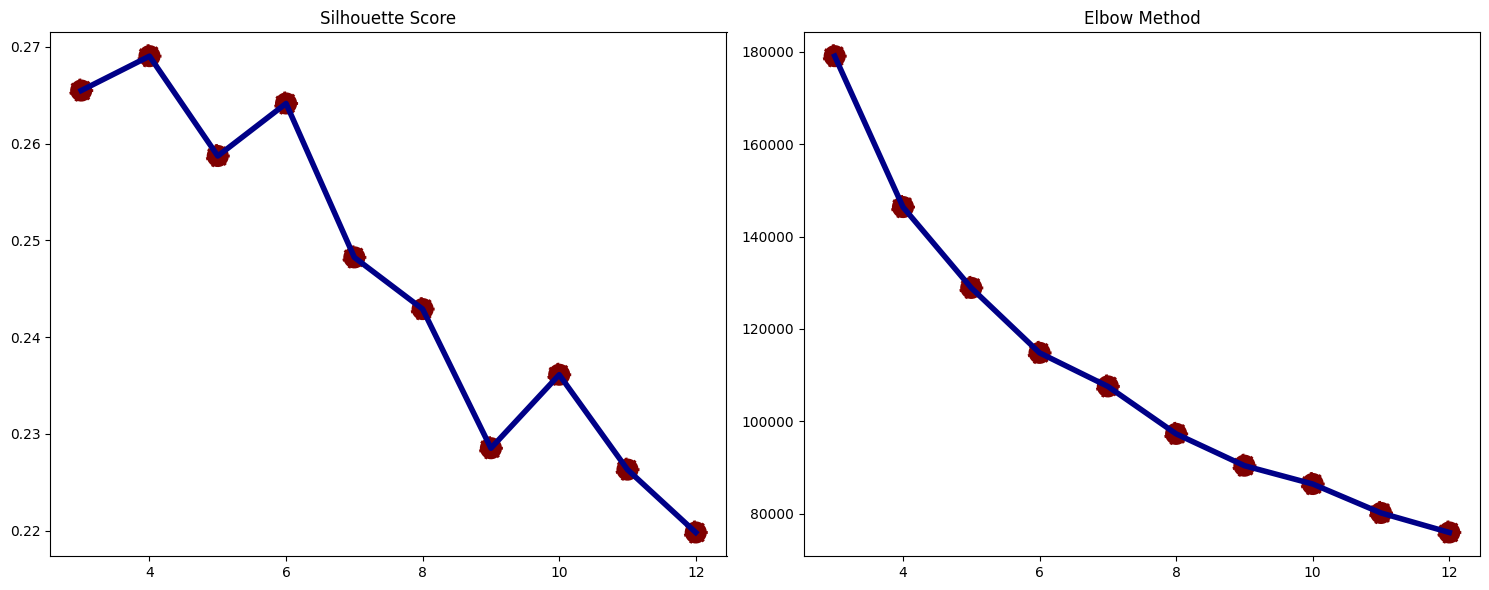

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot Silhouette Score
sns.lineplot(x=range(3, 13), y=arr_silhouette_score_euclidean, color='#000087', linewidth=4, ax=ax[0])
sns.scatterplot(x=range(3, 13), y=arr_silhouette_score_euclidean, s=300, color='#800000', linestyle='--', ax=ax[0])
ax[0].set_title('Silhouette Score')

# Plot Elbow (Inertia)
sns.lineplot(x=range(3, 13), y=list_inertia, color='#000087', linewidth=4, ax=ax[1])
sns.scatterplot(x=range(3, 13), y=list_inertia, s=300, color='#800000', linestyle='--', ax=ax[1])
ax[1].set_title('Elbow Method')

plt.tight_layout()
plt.show()

Based on the Silhouette Score, the optimal number of clusters is 4, while the Elbow Method does not show a clear elbow point, although there is an indication of a change at k = 6. Additionally, the Silhouette Scores for k = 3, 4, 5, and 6 are relatively high and close to each other. Therefore, evaluating multiple cluster options is important to ensure a more robust model selection rather than relying solely on visual interpretation of the metrics.

## Modelling

#### 3 Cluster

In [31]:
lrfmc_std_3 = lrfmc_std.copy()
kmeans3 = KMeans(n_clusters=3, random_state=0)
kmeans3.fit(lrfmc_std_3)

KMeans(n_clusters=3, random_state=0)

In [32]:
lrfmc_std_3['clusters'] = kmeans3.labels_
lrfmc_std_3.head()

,L,R,F,M,C,clusters
0,1.451116,-0.952618,4.477999,4.530848,1.315351,1
1,1.309482,-0.919977,4.477999,4.530848,2.908481,1
2,1.344890,-0.898217,4.477999,4.530848,2.921422,1
3,0.672131,-0.430362,0.887608,4.530848,2.023636,1
4,0.388863,-0.930858,4.477999,4.530848,1.364782,1


#### 4 Cluster

In [33]:
lrfmc_std_4 = lrfmc_std.copy()
kmeans4 = KMeans(n_clusters=4, random_state=0)
kmeans4.fit(lrfmc_std_4)

KMeans(n_clusters=4, random_state=0)

In [34]:
lrfmc_std_4['clusters'] = kmeans4.labels_
lrfmc_std_4.head()

,L,R,F,M,C,clusters
0,1.451116,-0.952618,4.477999,4.530848,1.315351,1
1,1.309482,-0.919977,4.477999,4.530848,2.908481,1
2,1.344890,-0.898217,4.477999,4.530848,2.921422,1
3,0.672131,-0.430362,0.887608,4.530848,2.023636,1
4,0.388863,-0.930858,4.477999,4.530848,1.364782,1


#### 5 Cluster

In [35]:
lrfmc_std_5 = lrfmc_std.copy()
kmeans5 = KMeans(n_clusters=5, random_state=0)
kmeans5.fit(lrfmc_std_5)

KMeans(n_clusters=5, random_state=0)

In [36]:
lrfmc_std_5['clusters'] = kmeans5.labels_
lrfmc_std_5.head()

,L,R,F,M,C,clusters
0,1.451116,-0.952618,4.477999,4.530848,1.315351,1
1,1.309482,-0.919977,4.477999,4.530848,2.908481,1
2,1.344890,-0.898217,4.477999,4.530848,2.921422,1
3,0.672131,-0.430362,0.887608,4.530848,2.023636,1
4,0.388863,-0.930858,4.477999,4.530848,1.364782,1


#### 6 Cluster

In [37]:
lrfmc_std_6 = lrfmc_std.copy()
kmeans6 = KMeans(n_clusters=6, random_state=0)
kmeans6.fit(lrfmc_std_6)

KMeans(n_clusters=6, random_state=0)

In [38]:
lrfmc_std_6['clusters'] = kmeans6.labels_
lrfmc_std_6.head()

,L,R,F,M,C,clusters
0,1.451116,-0.952618,4.477999,4.530848,1.315351,5
1,1.309482,-0.919977,4.477999,4.530848,2.908481,5
2,1.344890,-0.898217,4.477999,4.530848,2.921422,5
3,0.672131,-0.430362,0.887608,4.530848,2.023636,5
4,0.388863,-0.930858,4.477999,4.530848,1.364782,5


## Visualization with PCA

### 3 Cluster

<Axes: xlabel='PC 1', ylabel='PC 2'>

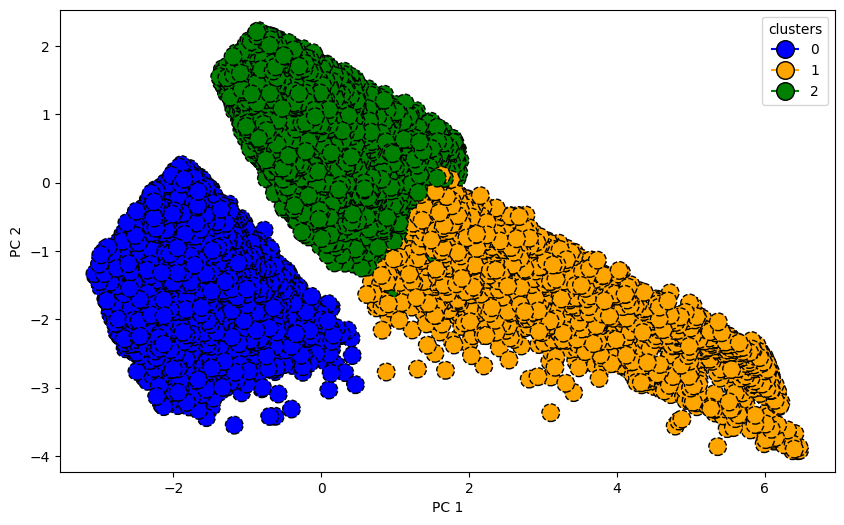

In [39]:
pca = PCA(n_components=2)

pca.fit(lrfmc_std_3)
pcs = pca.transform(lrfmc_std_3)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = lrfmc_std_3['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple', 'brown'],
    s=160,
    ax=ax
)

### 4 Cluster

<Axes: xlabel='PC 1', ylabel='PC 2'>

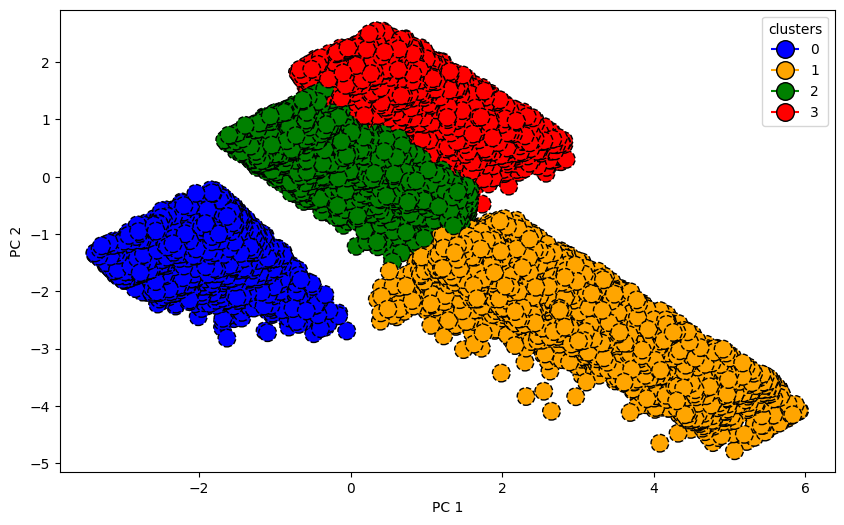

In [40]:
pca = PCA(n_components=2)

pca.fit(lrfmc_std_4)
pcs = pca.transform(lrfmc_std_4)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = lrfmc_std_4['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple', 'brown'],
    s=160,
    ax=ax
)

### 5 Cluster

<Axes: xlabel='PC 1', ylabel='PC 2'>

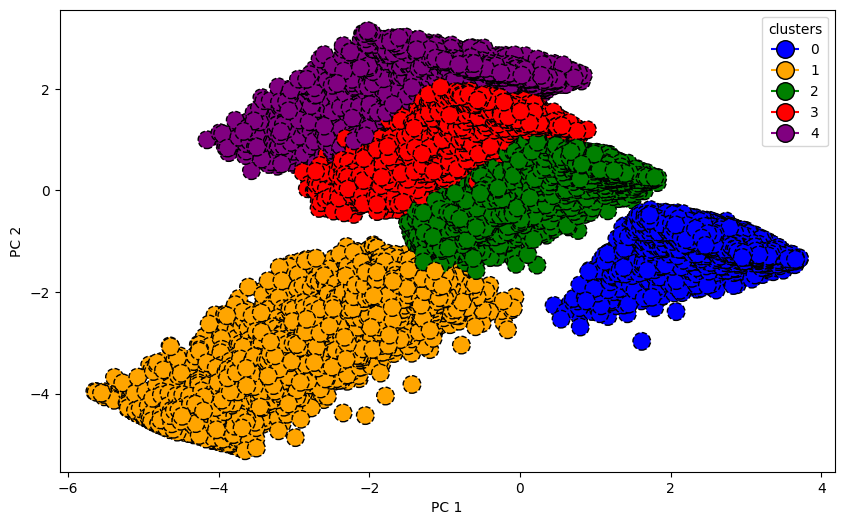

In [41]:
pca = PCA(n_components=2)

pca.fit(lrfmc_std_5)
pcs = pca.transform(lrfmc_std_5)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = lrfmc_std_5['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple', 'brown'],
    s=160,
    ax=ax
)

### 6 Cluster

<Axes: xlabel='PC 1', ylabel='PC 2'>

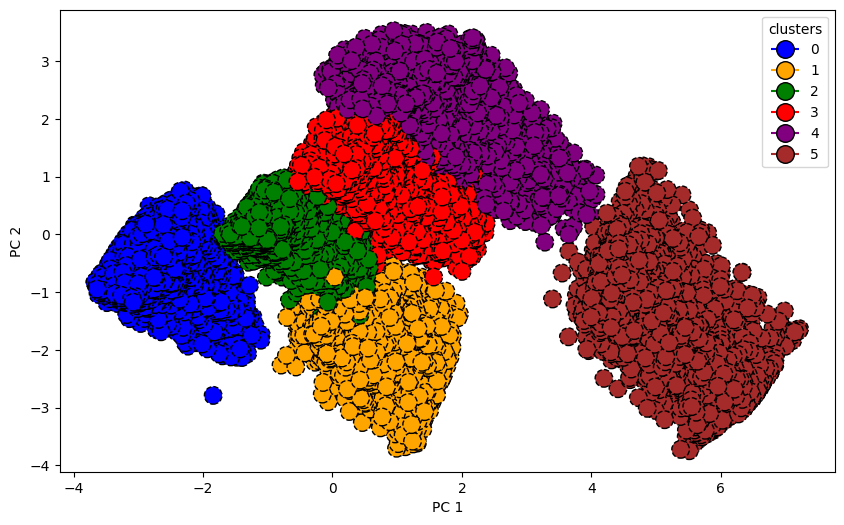

In [42]:
pca = PCA(n_components=2)

pca.fit(lrfmc_std_6)
pcs = pca.transform(lrfmc_std_6)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = lrfmc_std_6['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple', 'brown'],
    s=160,
    ax=ax
)

## Evaluation

In [43]:
# Make dataframe for show silhouette score
silhouette_df = pd.DataFrame({
    'Number of Clusters': range_n_clusters,
    'Silhouette Score': arr_silhouette_score_euclidean
})

# print DataFrame
print(silhouette_df)

   Number of Clusters  Silhouette Score
0                   3          0.265496
1                   4          0.269053
2                   5          0.258727
3                   6          0.264160
4                   7          0.248243
5                   8          0.242899
6                   9          0.228511
7                  10          0.236111
8                  11          0.226299
9                  12          0.219800


Based on the previous scatterplot and silhouette score, the k-means model with 4 clusters is the best choice. This model produces more well-defined and consistent clusters, making it suitable for further analysis or decision-making.

# Insight dan Rekomendasi

In [44]:
#karakteristik unik dari masing-masing kelompok pelanggan.
lrfmc['clusters'] = kmeans4.labels_

# Apply formatting to the output after aggregation
cluster_summary = lrfmc.groupby('clusters').agg({
    'L': ['mean'],
    'R': ['mean'],
    'F': ['mean'],
    'M': ['mean'],
    'C': ['mean']
})

# Format the output using .style.format
cluster_summary.style.format("{:.3f}")

,L,R,F,M,C
,mean,mean,mean,mean,mean
clusters,,,,,
0,40.028,478.888,3.770,5810.108,0.719
1,61.374,31.727,42.611,61991.546,0.788
2,29.318,101.828,9.068,13003.028,0.695
3,81.257,111.545,9.838,13972.666,0.738


Analisis Karakteristik Masing-Masing Cluster

**Cluster 0 – Pelanggan Lama Tapi Tidak Aktif**

* *Length*: 40 hari (anggota relatif baru)
* *Recency*: 479 hari (lama tidak aktif atau terbang)
* *Frequency*: 3.77 kali (frekuensi rendah)
* *Monetary*: 5,810 km (nilai pembelian rendah)
* *Discount*: 0.72 (menggunakan diskon cukup tinggi)
<br>Karakteristik: Pelanggan yang sudah lama menjadi anggota tetapi sudah lama tidak aktif terbang. Frekuensi terbang dan nilai pembelian rendah, dengan kecenderungan kuat menggunakan diskon untuk menarik mereka kembali.

**Cluster 1 – Pelanggan Premium Sangat Aktif**

* *Length*: 61 hari (anggota cukup lama)
* *Recency*: 32 hari (terbang sangat baru-baru ini)
* *Frequency*: 42.6 kali (frekuensi sangat tinggi)
* *Monetary*: 61,991 km (nilai pembelian sangat tinggi)
* *Discount*: 0.79 (menggunakan diskon tinggi)
<br>Karakteristik: Pelanggan sangat aktif dan sering terbang dengan nilai pembelian terbesar. Mereka juga memanfaatkan diskon cukup intensif. Ini adalah segmen pelanggan premium.

**Cluster 2 –  Pelanggan Baru dengan Aktivitas Menengah**

* *Length*: 29 hari (anggota baru)
* *Recency*: 102 hari (cukup lama tidak terbang)
* *Frequency*: 9 kali (frekuensi sedang)
* *Monetary*: 13,003 km (nilai pembelian menengah)
* *Discount*: 0.70 (menggunakan diskon sedang)
<br>Karakteristik: Pelanggan yang relatif baru dengan aktivitas terbang sedang dan nilai pembelian menengah. Mereka menggunakan diskon secara moderat dan berpotensi untuk menjadi pelanggan lebih loyal.

**Cluster 3 – Pelanggan Lama dengan Aktivitas Cukup**

* *Length*: 81 hari (anggota lama)
* *Recency*: Recency: 112 hari (cukup lama tidak terbang)
* *Frequency*: 9.8 kali (frekuensi sedang ke tinggi)
* *Monetary*: 13,972 km (nilai pembelian menengah ke tinggi)
* *Discount*: 0.74 (menggunakan diskon cukup tinggi)
<br>Karakteristik: Pelanggan yang sudah lama bergabung dan masih cukup aktif terbang dengan frekuensi sedang dan nilai pembelian menengah ke atas. Mereka juga menggunakan diskon secara signifikan, menunjukkan kecenderungan untuk mempertahankan aktivitas melalui penawaran.

---

Rekomendasi Strategi Bisnis

**Pelanggan Lama Tapi Tidak Aktif (Cluster 0)**

* Fokus pada kampanye reaktivasi dengan penawaran diskon besar atau voucher perjalanan khusus untuk mengajak mereka kembali terbang.
* Kirim komunikasi personal (email, SMS, notifikasi aplikasi) dengan penawaran eksklusif yang relevan.
* Evaluasi dan atasi potensi kendala, misalnya jadwal penerbangan yang tidak fleksibel atau harga tiket.
Tawarkan program loyalitas berbasis poin untuk setiap penerbangan berikutnya guna meningkatkan motivasi.

**Pelanggan Premium Sangat Aktif (Cluster 1)**

* Berikan layanan premium seperti akses lounge VIP, prioritas check-in, dan upgrade gratis atau diskon kelas bisnis.
* Kembangkan program loyalitas eksklusif dengan reward besar seperti tiket gratis, paket liburan, atau merchandise khusus.
* Personalisasi komunikasi dengan rekomendasi destinasi favorit dan penawaran khusus berdasarkan histori penerbangan.
* Pastikan layanan pelanggan responsif dan istimewa untuk menjaga kepuasan dan loyalitas jangka panjang.

**Pelanggan Baru dengan Aktivitas Menengah (Cluster 2)**

* Tingkatkan edukasi mengenai manfaat program frequent flyer dan cara memaksimalkan poin.
* Berikan insentif berupa bonus poin, diskon awal, atau paket bundling agar mereka lebih sering terbang.
* Gunakan kampanye pemasaran digital yang interaktif dan menarik untuk membangun engagement.
* Permudah pengalaman pemesanan melalui aplikasi dan sediakan bantuan pelanggan yang mudah diakses.

**Pelanggan Lama dengan Aktivitas Cukup (Cluster 3)**

* Pertahankan loyalitas dengan program penghargaan poin ekstra dan penawaran khusus saat musim liburan atau low season.
* Sediakan update rutin tentang promo dan destinasi baru agar tetap tertarik.
* Tawarkan program referral untuk memperluas basis pelanggan melalui rekomendasi mereka.
* Berikan fleksibilitas jadwal dan kemudahan perubahan tiket untuk meningkatkan kenyamanan.
